# **Project Overview:**
Use the Netflix Movies and TV Shows dataset to perform a comprehensive data analysis. Begin with data loading and proceed with cleaning, manipulation, and visualization tasks.

Dataset: Netflix Movies and TV Shows

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('/content/drive/MyDrive/kaggle-netflix-tv-shows-and-movies-main/titles.csv')

In [5]:
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [31]:
data['tmdb_score'].isnull().sum()

317

In [32]:
data = data.dropna(subset=['tmdb_score'])

In [33]:
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3


In [34]:
# Exploratory Data Analysis
print(data.describe())

       release_year      runtime      seasons   imdb_score    imdb_votes  \
count   5488.000000  5488.000000  1915.000000  5055.000000  5.041000e+03   
mean    2015.982325    78.311771     2.216710     6.535687  2.434916e+04   
std        7.345980    39.405828     2.700194     1.151330  8.872408e+04   
min     1953.000000     0.000000     1.000000     1.600000  5.000000e+00   
25%     2016.000000    45.000000     1.000000     5.800000  6.160000e+02   
50%     2018.000000    85.000000     1.000000     6.600000  2.534000e+03   
75%     2020.000000   105.000000     2.000000     7.400000  1.103900e+04   
max     2022.000000   251.000000    42.000000     9.500000  2.268288e+06   

       tmdb_popularity   tmdb_score  
count      5488.000000  5488.000000  
mean         23.324757     6.818039  
std          70.105410     1.171560  
min           0.055091     0.500000  
25%           3.412750     6.100000  
50%           7.918000     6.900000  
75%          18.434000     7.500000  
max        

In [37]:
data['tmdb_score'].unique()

array([ 8.2,  7.8,  7.7,  8.3,  7.5,  7.6,  6.2,  7.1,  7.4,  6.6,  7.2,
        6.5,  6.1,  6.3,  5.9,  6. ,  5.8,  4.9,  7. ,  5.4,  8. ,  8.5,
        5.3,  7.3,  5. ,  6.8,  3.8,  7.9,  8.4,  8.1,  6.7,  5.6,  6.9,
        6.4,  9.2,  5.5,  8.8,  8.6,  5.7,  5.1,  8.7,  4.7,  4.8,  4. ,
        5.2,  9. ,  9.8,  8.9,  2. ,  4.3,  3.4,  4.6,  3.9,  4.1,  2.3,
        4.5,  3.3, 10. ,  9.1,  2.7,  1. ,  4.4,  3.7,  3.5,  9.5,  9.3,
        3.1,  2.9,  3.6,  9.7,  4.2,  2.8,  0.5,  9.4,  2.4,  3. ,  9.6,
        2.5])

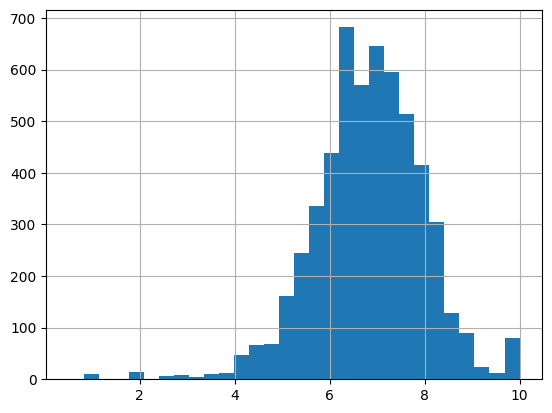

In [35]:
data['tmdb_score'].hist(bins = 30)
plt.show()

In [43]:
# Most common genres
genres = data['genres'].str.split(', ').explode()

common_genres = genres.value_counts().head(10)
print(common_genres)

genres
['drama'       1041
'drama'         791
['comedy'       775
'drama']        645
'comedy'        547
'action'        492
['comedy']      485
'european']     438
'romance']      426
'thriller'      424
Name: count, dtype: int64


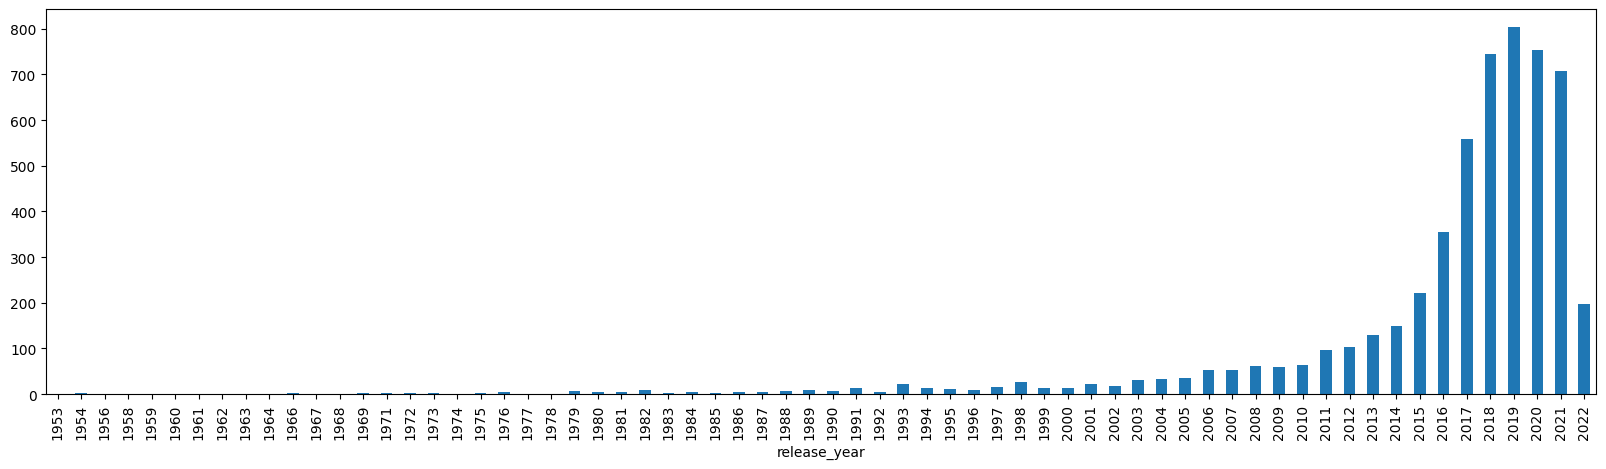

In [48]:
# Number of shows released each year

year_cnt = data['release_year'].value_counts().sort_index()

year_cnt.plot(kind = 'bar', figsize=(20, 5))
plt.show()

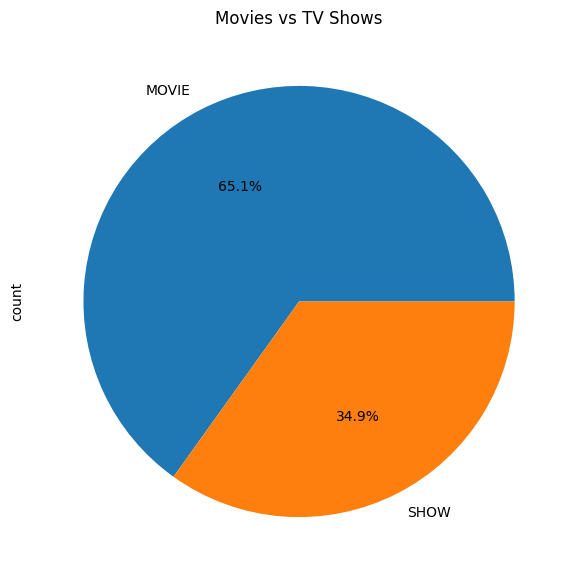

In [50]:
# Compare movies vs TV shows
content_type_counts = data['type'].value_counts()
content_type_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title('Movies vs TV Shows')
plt.show()